In [340]:
# Imports
import math

# Pandas
import pandas as pd
from pandas import Series,DataFrame

# Numpy, Matplotlib, Seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load train.csv
train = pd.read_csv('data/train.csv')
# Load test.csv
test = pd.read_csv('data/test.csv')

train_original = train.copy()

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cabin

0.22895622895622897

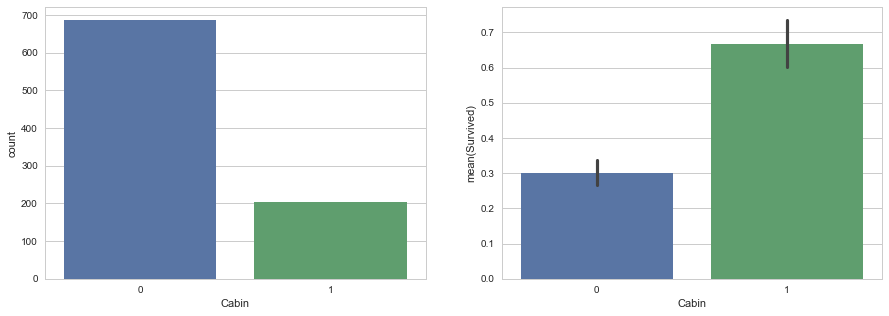

In [341]:
# Cabin
train["Cabin"] = train["Cabin"].map(lambda x: 0 if(pd.isnull(x)) else 1)
test["Cabin"] = test["Cabin"].map(lambda x: 0 if(pd.isnull(x)) else 1)

# Plot 
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="Cabin", data=train, ax=axis1)
g = sns.factorplot(x="Cabin", y="Survived", data=train, kind="bar", ax=axis2)

plt.close(g.fig)

train["Cabin"].mean()

# Embarked

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

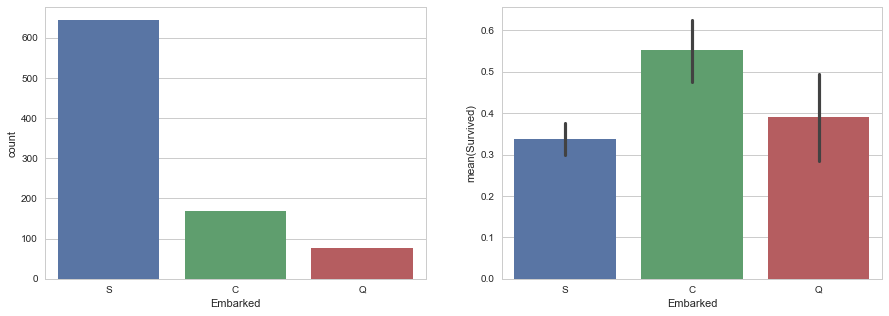

In [342]:
# Embarked

# Plot 
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="Embarked", data=train, ax=axis1)
g = sns.factorplot(x="Embarked", y="Survived", data=train, kind="bar", ax=axis2)

plt.close(g.fig)

train['Survived'].groupby(train['Embarked']).mean()

# Parch

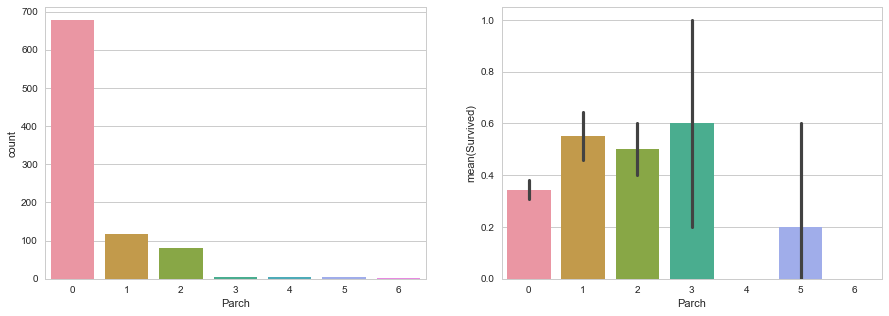

In [343]:
# Parch
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="Parch", data=train, ax=axis1)
g = sns.factorplot(x="Parch", y="Survived", data=train, kind="bar", ax=axis2)

plt.close(g.fig)

# SibSp

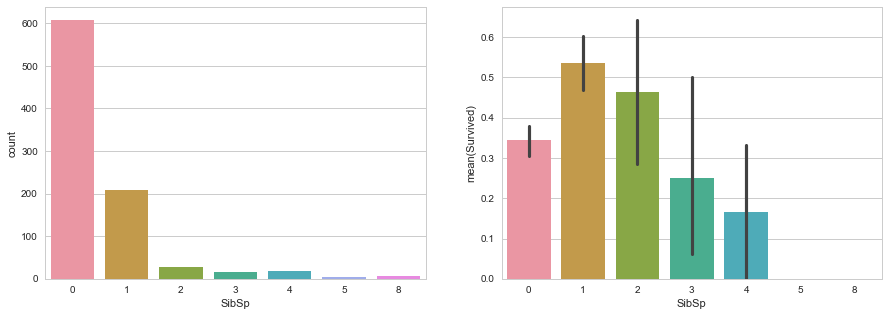

In [344]:
# SibSp
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="SibSp", data=train.sort_values("SibSp"), ax=axis1)
g = sns.factorplot(x="SibSp", y="Survived", data=train.sort_values("SibSp"), kind="bar", ax=axis2)

plt.close(g.fig)

# Family Size

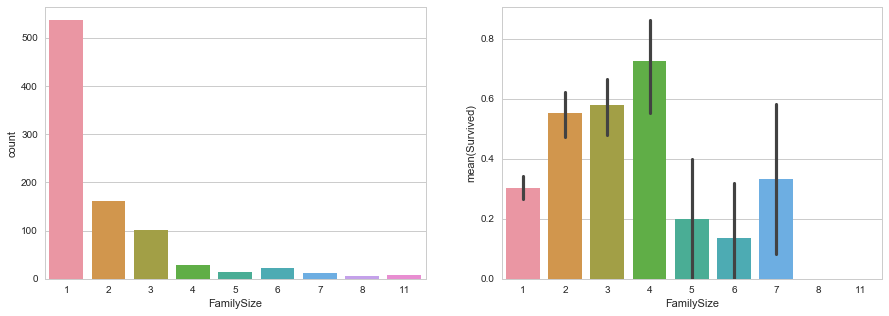

In [345]:
# Family size
def get_family_size(df):
    df["FamilySize"] = df["Parch"] + df["SibSp"] + 1
    df.drop(["Parch", "SibSp"], axis=1, inplace=True)
    
get_family_size(train)
get_family_size(test)

# Plot
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="FamilySize", data=train, ax=axis1)
g = sns.factorplot(x="FamilySize", y="Survived", data=train, kind="bar", ax=axis2)

plt.close(g.fig)

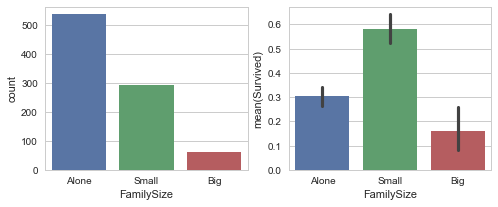

In [346]:
# Family size into classes
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(8,3))

def family_size_to_class(size):
    if (size == 1):
        return "Alone"
    elif (size < 5):
        return "Small"
    else:
        return "Big"

train["FamilySize"] = train["FamilySize"].map(family_size_to_class)
test["FamilySize"] = test["FamilySize"].map(family_size_to_class)

sns.countplot(x="FamilySize", data=train, order=['Alone', 'Small', 'Big'], ax=axis1)
g = sns.factorplot(x="FamilySize", y="Survived", data=train, order=['Alone', 'Small', 'Big'], kind="bar", ax=axis2)

plt.close(g.fig)

# Pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

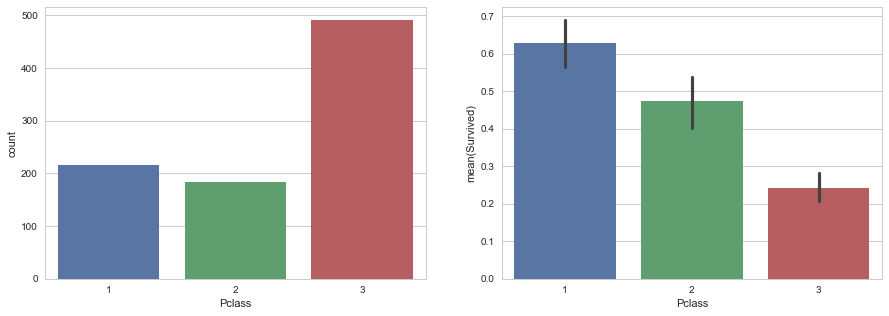

In [347]:
# Pclass
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="Pclass", data=train, ax=axis1)
g = sns.factorplot(x="Pclass", y="Survived", data=train, kind="bar", ax=axis2)

plt.close(g.fig)

train['Survived'].groupby(train['Pclass']).mean()

# Sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

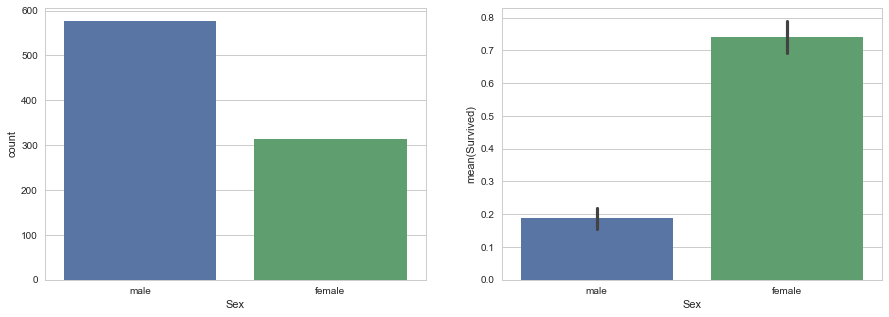

In [348]:
# Sex
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="Sex", data=train, ax=axis1)
g = sns.factorplot(x="Sex", y="Survived", data=train, kind="bar", ax=axis2)

plt.close(g.fig)

train['Survived'].groupby(train['Sex']).mean()

# Name

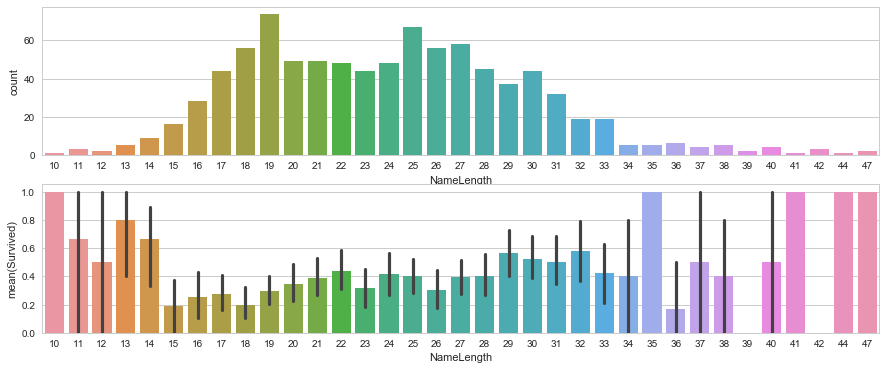

In [349]:
# Name length
def get_name_length(df):
    df["NameLength"] = df["Name"].apply(lambda name: name.split('(')[0]).apply(lambda name: len(name))
    #df["NameLength"] = df["NameLength"].apply(lambda x: int(x/10))

get_name_length(train)
get_name_length(test)

# Plot
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,6))

sns.countplot(x="NameLength", data=train.sort_values("NameLength"), ax=axis1)
g = sns.factorplot(x="NameLength", y="Survived", data=train.sort_values("NameLength"), kind="bar", ax=axis2)

plt.close(g.fig)

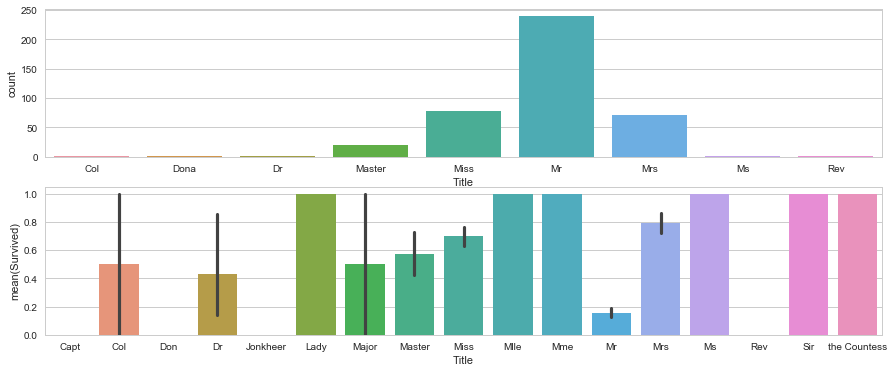

In [350]:
# Title
train["Title"] = train["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())
test["Title"] = test["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Plot
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,6))

sns.countplot(x="Title", data=test.sort_values("Title"), ax=axis1)
g = sns.factorplot(x="Title", y="Survived", data=train.sort_values("Title"), kind="bar", ax=axis2)

plt.close(g.fig)

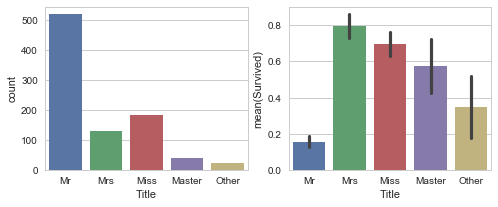

In [351]:
# Title processing
def process_title(df):
    df["Title"] = df["Title"].replace("Mme", "Mrs")
    df["Title"] = df["Title"].replace("Ms", "Mrs")
    df["Title"] = df["Title"].replace("Mlle", "Mrs")
    df["Title"] = df["Title"].apply(lambda x: x if (x in ["Mr", "Mrs", "Miss", "Master"]) else "Other")

process_title(train)
process_title(test)

# Plot
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(8,3))

sns.countplot(x="Title", data=train, ax=axis1)
g = sns.factorplot(x="Title", y="Survived", data=train, kind="bar", ax=axis2)

plt.close(g.fig)

# Ticket

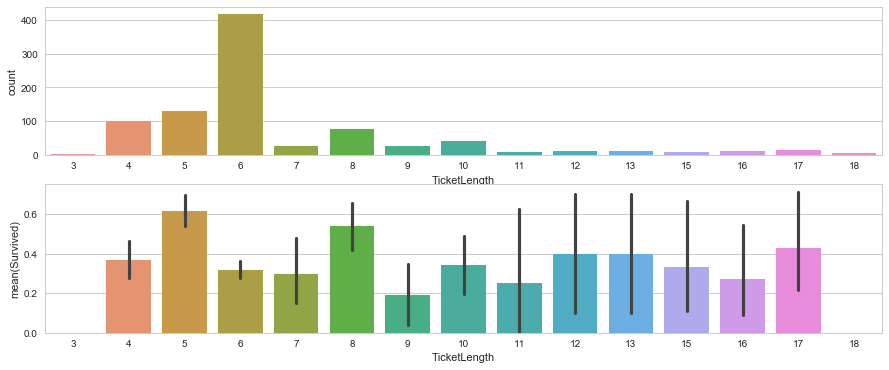

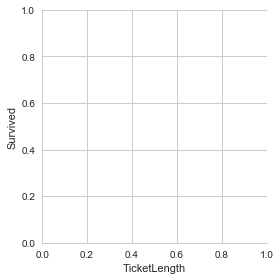

In [352]:
# Ticket length
train["TicketLength"] = train["Ticket"].apply(lambda t: len(t))
#test["TicketLength"] = train["Ticket"].apply(lambda t: len(t))

# Plot
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,6))

sns.countplot(x="TicketLength", data=train.sort_values("TicketLength"), ax=axis1)
g = sns.factorplot(x="TicketLength", y="Survived", data=train.sort_values("TicketLength"), kind="bar", ax=axis2)

#plt.close(g.fig)

train.drop("TicketLength", axis=1, inplace=True)

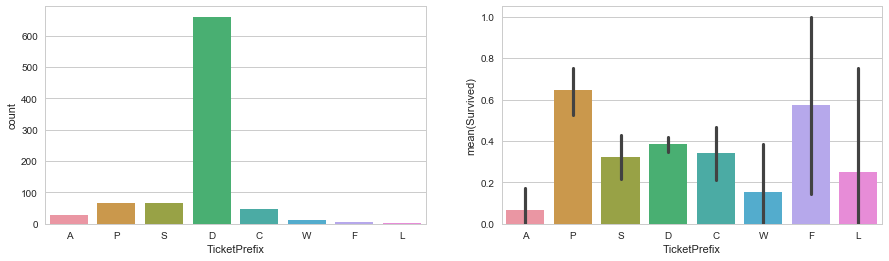

In [353]:
train["TicketPrefix"] = train["Ticket"].apply(lambda t: t.split(' ')[0])
train["TicketPrefix"] = train["TicketPrefix"].apply(lambda t: t[0] if (t[0].isalpha()) else "D")
#test["TicketPrefix"] = test["Ticket"].apply(lambda t: t.split(' ')[0])
#test["TicketPrefix"] = test["TicketPrefix"].apply(lambda t: t[0] if (t[0].isalpha()) else "D")

# Plot
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.countplot(x="TicketPrefix", data=train, ax=axis1)
g = sns.factorplot(x="TicketPrefix", y="Survived", data=train, kind="bar", ax=axis2)

plt.close(g.fig)

train.drop("TicketPrefix", axis=1, inplace=True)

# Age

0.19865319865319866

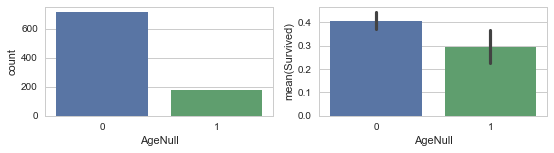

In [354]:
# Age
train["AgeNull"] = train["Age"].apply(lambda a: 1 if pd.isnull(a) else 0)
test["AgeNull"] = test["Age"].apply(lambda a: 1 if pd.isnull(a) else 0)

# Plot
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(9,2))

sns.countplot(x="AgeNull", data=train.sort_values("AgeNull"), ax=axis1)
g = sns.factorplot(x="AgeNull", y="Survived", data=train.sort_values("AgeNull"), kind="bar", ax=axis2)

plt.close(g.fig)

train["AgeNull"].mean()

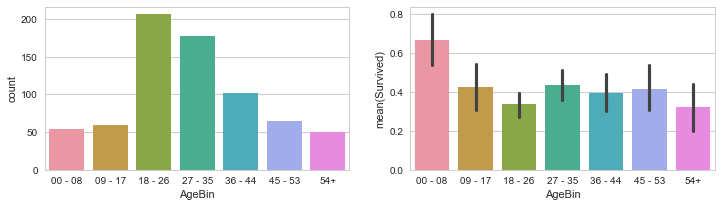

In [355]:
# Age
def to_age_bin(age):
    if (pd.isnull(age)):
        return age
    
    if (age > 53):
        return "54+"
    
    age = int(age)
    start = age - age % 9
    end = start + 8
    return "%02d - %02d" % (start, end)

train["AgeBin"] = train["Age"].map(to_age_bin)
    
# Plot
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,3))

sns.countplot(x="AgeBin", data=train.sort_values("AgeBin"), ax=axis1)
g = sns.factorplot(x="AgeBin", y="Survived", data=train.sort_values("AgeBin"), kind="bar", ax=axis2)

plt.close(g.fig)

# Just for vis so drop
train.drop("AgeBin", axis=1, inplace=True)

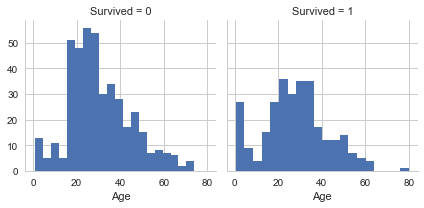

In [356]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# Fare

In [357]:
# Fare
train['Survived'].groupby(pd.qcut(train["Fare"],4)).mean()

Fare
[0, 7.91]         0.197309
(7.91, 14.454]    0.303571
(14.454, 31]      0.454955
(31, 512.329]     0.581081
Name: Survived, dtype: float64

# Insert missing values

In [358]:
# Fill NA ages in train and test, depending on title and class
def impute_age(df):
    titles = df["Title"].unique() 

    for title in titles:
        title_df = df.loc[train["Title"] == title]
        pclasses = title_df["Pclass"].unique()
        title_median = title_df["Age"].median()

        for pclass in pclasses:
            title_pclass_df = title_df.loc[df["Pclass"] == pclass]
            median = title_pclass_df["Age"].dropna().median()
            if (pd.isnull(median)):
                median = title_median

            df.loc[(df.Title == title) & (df.Pclass == pclass) & (df.Age.isnull()), "Age"] = median
            
    df["Age"] = df["Age"].astype(int)

impute_age(train)
impute_age(test)

# Fill NA Embarked in train
# Only two values were missing, fill in most common value
train["Embarked"].fillna("S", inplace=True)

# Fill NA Fare in test
# Only one was missing, guy from class 3, fill with median value for that class
test["Fare"].fillna(train.loc[train["Pclass"] == 3]["Fare"].median(), inplace=True)

# Create dummies, remove unused columns

In [359]:
# Create dummies and remove unused columns
def dummies(df, columns):
    for col in columns:
        df = df.join(pd.get_dummies(df[col], prefix=col))
        df.drop(col, axis=1, inplace=True)
    return df
        
dummy_features = ["Pclass", "Title", "Embarked", "FamilySize"]
train = dummies(train, dummy_features)
test = dummies(test, dummy_features)

# Convert Sex
def convert_sex(df):
    df["Sex"] = df["Sex"].map(lambda x: 1 if (x == 'male') else 0)

convert_sex(train)
convert_sex(test)

# Drop irrelevant columns (but keep passenger IDs of test set)
test_passengers = test["PassengerId"]
test.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
train.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

train.head()

,Survived,Sex,Age,Fare,Cabin,NameLength,AgeNull,Pclass_1,Pclass_2,Pclass_3,...,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Embarked_C,Embarked_Q,Embarked_S,FamilySize_Alone,FamilySize_Big,FamilySize_Small
0,0,1,22,7.2500,0,23,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,1,0,38,71.2833,1,27,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,1,0,26,7.9250,0,22,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
3,1,0,35,53.1000,1,29,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,1,35,8.0500,0,24,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0


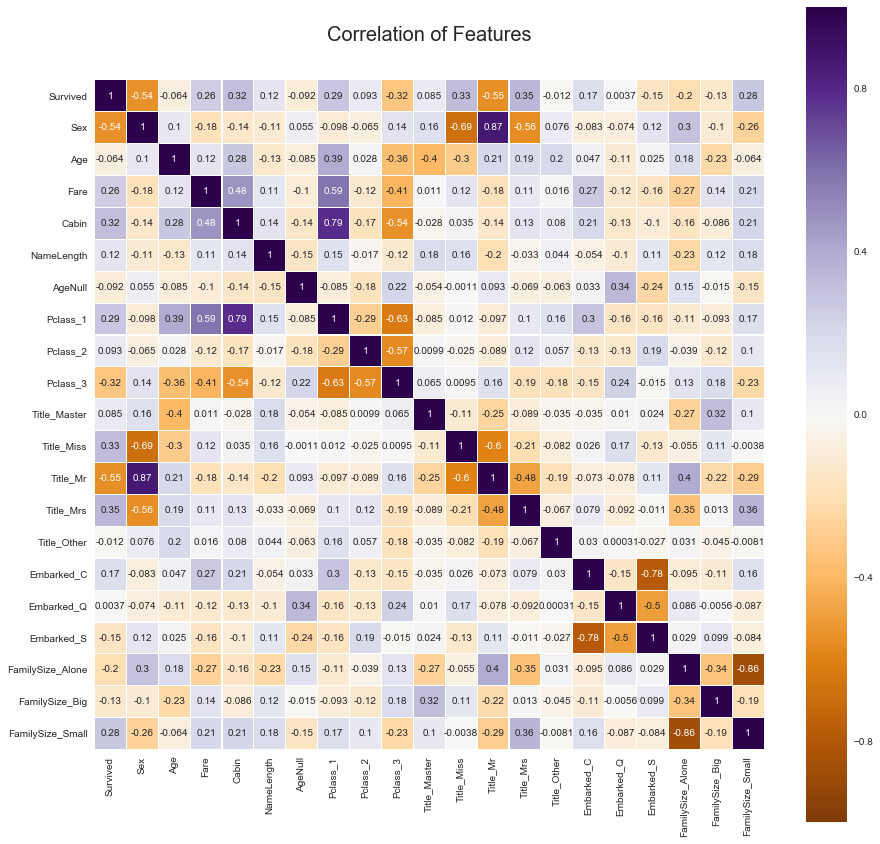

In [360]:
colormap = plt.cm.PuOr
plt.figure(figsize=(15,15))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [361]:
# We only need k-1 dummy features, so delete some
#drop_columns = ["Title_Mr", "Pclass_1", "Embarked_S", "FamilySize_Alone"]
#train.drop(drop_columns, axis=1, inplace=True)
#test.drop(drop_columns, axis=1, inplace=True)

# Feature normalization

In [362]:
norm_features = ["Age", "Fare", "NameLength"]

# Train mins and maxes (used to scale test set as well, apparently appropriate way to do it)
train_mean = {}
train_std = {}

def find_train_mean_std(cols):
    for col in cols:
        train_mean[col] = train[col].mean()
        train_std[col] = train[col].std()
        
find_train_mean_std(norm_features)

# Feature normalization
def normalize_cols(df, cols=norm_features):
    df = df.copy()
    for col in cols:
        df[col] = (df[col] - train_mean[col]) / (train_std[col])
    return df
    

norm_train = normalize_cols(train)
norm_test = normalize_cols(test)

# Generate train/test data

In [363]:
# Generate train and test set from training data
train_chunks = np.array_split(train, 5)
train_train = []
train_test = []

for i in range(5):
    frames = []
    for j in range(5):
        if (i == j):
            continue
        frames.append(train_chunks[j])
    
    train_train.append(pd.concat(frames))
    train_test.append(train_chunks[i])

# Try different algorithms

In [376]:
# Support Vector Machines
accuracy = np.zeros(5)
score = np.zeros(5)
for i in range(5):
    train_train_X = normalize_cols(train_train[i].drop("Survived", axis=1))
    train_train_Y = train_train[i]["Survived"]
    train_test_X = normalize_cols(train_test[i].drop("Survived", axis=1))
    train_test_Y = train_test[i]["Survived"]

    svc = SVC()
    
    svc.fit(train_train_X, train_train_Y)
    
    pred_Y = svc.predict(train_test_X)
    
    #accuracy[i] = (train_test_Y == pred_Y).mean()
    accuracy[i] = svc.score(train_test_X, train_test_Y)
    score[i] = svc.score(train_train_X, train_train_Y)

(accuracy.mean(), accuracy.std(), score.mean(), score.std())

(0.83499466449061577,
 0.028000372861670272,
 0.83557684731392912,
 0.0071999262296123584)

In [382]:
# Random Forest
accuracy = np.zeros(5)
score = np.zeros(5)
for i in range(5):
    train_train_X = (train_train[i].drop("Survived", axis=1))
    train_train_Y = train_train[i]["Survived"]
    train_test_X = (train_test[i].drop("Survived", axis=1))
    train_test_Y = train_test[i]["Survived"]

    rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
    
    rf.fit(train_train_X, train_train_Y)
    
    pred_Y = rf.predict(train_test_X)
    
    accuracy[i] = rf.score(train_test_X, train_test_Y)
    score[i] = rf.score(train_train_X, train_train_Y)
    
(accuracy.mean(), accuracy.std(), score.mean(), score.std())

(0.81704224468018327,
 0.021034653114962058,
 0.90263879477441422,
 0.0092306263345222142)

In [378]:
# Logistic Regression
accuracy = np.zeros(5)
score = np.zeros(5)
for i in range(5):
    train_train_X = (train_train[i].drop("Survived", axis=1))
    train_train_Y = train_train[i]["Survived"]
    train_test_X = (train_test[i].drop("Survived", axis=1))
    train_test_Y = train_test[i]["Survived"]

    logreg = LogisticRegression()
    
    logreg.fit(train_train_X, train_train_Y)
    
    pred_Y = logreg.predict(train_test_X)
    
    accuracy[i] = (train_test_Y == pred_Y).mean()
    score[i] = logreg.score(train_train_X, train_train_Y)
    
(accuracy.mean(), accuracy.std(), score.mean(), score.std())

(0.83276630468897106,
 0.026479717851132768,
 0.83697937185810856,
 0.0062125227449384346)

In [380]:
# Nearest Neighbor
accuracy = np.zeros(5)
score = np.zeros(5)
for i in range(5):
    train_train_X = normalize_cols(train_train[i].drop("Survived", axis=1))
    train_train_Y = train_train[i]["Survived"]
    train_test_X = normalize_cols(train_test[i].drop("Survived", axis=1))
    train_test_Y = train_test[i]["Survived"]

    knn = KNeighborsClassifier(n_neighbors = 3)
    
    knn.fit(train_train_X, train_train_Y)
    
    pred_Y = knn.predict(train_test_X)
    
    accuracy[i] = (train_test_Y == pred_Y).mean()
    score[i] = knn.score(train_train_X, train_train_Y)
    
(accuracy.mean(), accuracy.std(), score.mean(), score.std())

(0.66222459355972629,
 0.032271767158337364,
 0.82632057928991287,
 0.004744508688266748)

# Submit

In [368]:
# Final submission
train_X = train.drop("Survived", axis=1)
train_Y = train["Survived"]

#classifier = RandomForestClassifier(criterion='gini', 
#                             n_estimators=700,
#                             min_samples_split=10,
#                             min_samples_leaf=1,
#                             max_features='auto',
#                             oob_score=True,
#                             random_state=1,
#                             n_jobs=-1)
classifier = SVC()

classifier.fit(normalize_cols(train_X), train_Y)

pred_Y = classifier.predict(normalize_cols(test))

submission = pd.DataFrame({
        "PassengerId": test_passengers,
        "Survived": pred_Y
    })
submission.to_csv('prediction.csv', index=False)

In [370]:
train_original.loc[train_original.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


,Sex,Age,Fare,Cabin,NameLength,AgeNull,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Embarked_C,Embarked_Q,Embarked_S,FamilySize_Alone,FamilySize_Big,FamilySize_Small
0,1,-0.527012,-0.502163,0,-0.168955,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
1,0,0.658953,0.786404,1,0.528793,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
2,0,-0.230521,-0.488580,0,-0.343392,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
3,0,0.436584,0.420494,1,0.877667,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
4,1,0.436584,-0.486064,0,0.005482,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
